In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore") 

In [2]:
train_data = pd.read_csv('train_all.csv', nrows = 10000)
test_data = pd.read_csv('test_all.csv', nrows = 100)

In [3]:
train_data.head()

,user_id,merchant_id,age_range,gender,user_cnt,seller_nunique,cat_nunique,brand_nunique,item_nunique,time_stamp_nunique,...,embedding_93,embedding_94,embedding_95,embedding_96,embedding_97,embedding_98,embedding_99,lgb_clf,xgb_clf,label
0,105600.0,1487.0,6.0,1.0,310.0,96.0,37.0,88.0,217.0,29.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.933521,0.896583,0.0
1,110976.0,159.0,5.0,0.0,274.0,181.0,70.0,159.0,233.0,52.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.945943,0.934458,0.0
2,374400.0,302.0,5.0,1.0,278.0,57.0,59.0,62.0,148.0,35.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.927698,0.930589,0.0
3,189312.0,1760.0,4.0,0.0,237.0,49.0,35.0,45.0,170.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.917096,0.922519,0.0
4,189312.0,2511.0,4.0,0.0,237.0,49.0,35.0,45.0,170.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.938043,0.936024,0.0


In [4]:
test_data.head()

,user_id,merchant_id,age_range,gender,user_cnt,seller_nunique,cat_nunique,brand_nunique,item_nunique,time_stamp_nunique,...,embedding_92,embedding_93,embedding_94,embedding_95,embedding_96,embedding_97,embedding_98,embedding_99,lgb_clf,xgb_clf
0,105600.0,1487.0,6.0,1.0,310.0,96.0,37.0,88.0,217.0,29.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.931309,0.838208
1,110976.0,159.0,5.0,0.0,274.0,181.0,70.0,159.0,233.0,52.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.937711,0.940051
2,374400.0,302.0,5.0,1.0,278.0,57.0,59.0,62.0,148.0,35.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.934414,0.935365
3,189312.0,1760.0,4.0,0.0,237.0,49.0,35.0,45.0,170.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.931040,0.932673
4,189312.0,2511.0,4.0,0.0,237.0,49.0,35.0,45.0,170.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.929423,0.929092


In [5]:
train_data.columns

Index(['user_id', 'merchant_id', 'age_range', 'gender', 'user_cnt',
       'seller_nunique', 'cat_nunique', 'brand_nunique', 'item_nunique',
       'time_stamp_nunique',
       ...
       'embedding_93', 'embedding_94', 'embedding_95', 'embedding_96',
       'embedding_97', 'embedding_98', 'embedding_99', 'lgb_clf', 'xgb_clf',
       'label'],
      dtype='object', length=231)

In [6]:
features_columns = [col for col in train_data.columns if col not in ['user_id', 'label']]
train = train_data[features_columns].values
test = test_data[features_columns].values
target = train_data['label'].values

In [7]:
# split the data
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 100, max_depth = 2, random_state = 0, n_jobs = -1)
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size = 0.4, random_state = 0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

(1200, 229) (1200,)
(800, 229) (800,)


0.92875

In [8]:
# cross validation
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 100, max_depth = 2, random_state = 0, n_jobs = -1)
scores = cross_val_score(clf, train, target, cv = 5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2)) 

[0.9325 0.9325 0.9325 0.9325 0.93  ]
Accuracy: 0.93 (+/- 0.00)


In [9]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 100, max_depth = 2, random_state = 0, n_jobs = -1)
scores = cross_val_score(clf, train, target, cv = 5, scoring = 'f1_macro')
print(scores)  
print("F1: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.48253558 0.48253558 0.48253558 0.48253558 0.48186528]
F1: 0.48 (+/- 0.00)


In [10]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 100, max_depth = 2, random_state = 0, n_jobs = -1)
cv = ShuffleSplit(n_splits = 5, test_size = 0.3, random_state = 0)
cross_val_score(clf, train, target, cv = cv)  

array([0.915     , 0.93      , 0.92166667, 0.935     , 0.93333333])

In [11]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 100, max_depth = 2, random_state = 0, n_jobs = -1)
kf = KFold(n_splits = 5)
for k, (train_index, test_index) in enumerate(kf.split(train)):
    X_train, X_test, y_train, y_test = train[train_index], train[test_index], target[train_index], target[test_index]
    clf = clf.fit(X_train, y_train)
    print(k, clf.score(X_test, y_test))

0 0.93
1 0.92
2 0.94
3 0.94
4 0.93


In [12]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 100, max_depth = 2, random_state = 0, n_jobs = -1)
skf = StratifiedKFold(n_splits = 5)
for k, (train_index, test_index) in enumerate(skf.split(train, target)):
    X_train, X_test, y_train, y_test = train[train_index], train[test_index], target[train_index], target[test_index]
    clf = clf.fit(X_train, y_train)
    print(k, clf.score(X_test, y_test))

0 0.9325
1 0.9325
2 0.9325
3 0.9325
4 0.93


In [13]:
# Parameters tuning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier


# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size = 0.5, random_state = 0)

# model 
clf = RandomForestClassifier(n_jobs = -1)

# Set the parameters by cross-validation

tuned_parameters = {
                    'n_estimators': [50, 100, 200]
#                     ,'criterion': ['gini', 'entropy']
#                     ,'max_depth': [2, 5]
#                     ,'max_features': ['log2', 'sqrt', 'int']
#                     ,'bootstrap': [True, False]
#                     ,'warm_start': [True, False]
                    }

scores = ['precision']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(clf, tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'n_estimators': 50}

Grid scores on development set:

0.466 (+/-0.002) for {'n_estimators': 50}
0.466 (+/-0.003) for {'n_estimators': 100}
0.466 (+/-0.003) for {'n_estimators': 200}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96       932
         1.0       0.00      0.00      0.00        68

    accuracy                           0.92      1000
   macro avg       0.47      0.50      0.48      1000
weighted avg       0.87      0.92      0.89      1000




Confusion matrix, without normalization
[[455   4]
 [ 40   1]]
Normalized confusion matrix
[[0.99 0.01]
 [0.98 0.02]]


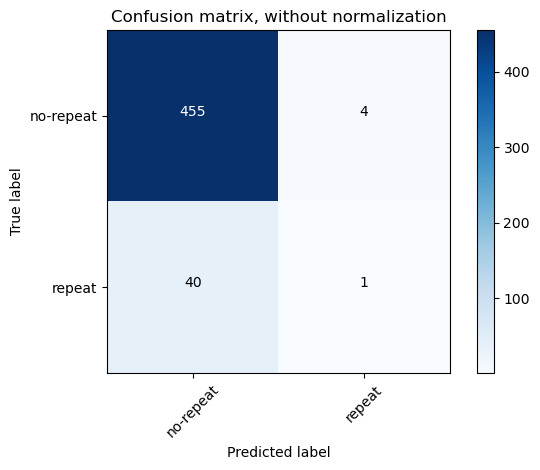

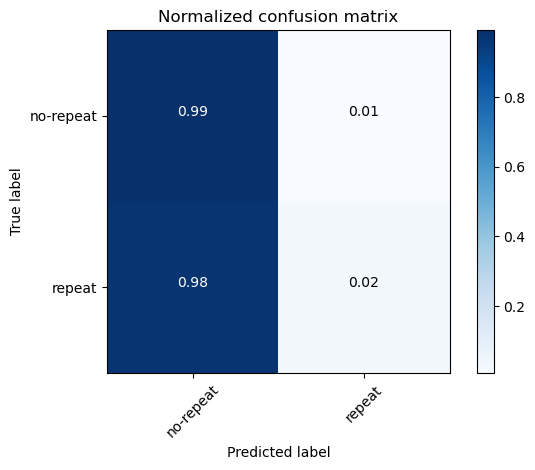

In [14]:
# confusion matrix
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# label name
class_names = ['no-repeat', 'repeat']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(train, target, random_state = 0)

# Run classifier, using a model that is too regularized (C too low) to see the impact on the results
clf = RandomForestClassifier(n_jobs = -1)
y_pred = clf.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = "center",
                 color = "white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision = 2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes = class_names,
                      title = 'Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes = class_names, normalize = True,
                      title = 'Normalized confusion matrix')

plt.show()

In [15]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

# label name
class_names = ['no-repeat', 'repeat']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(train, target, random_state = 0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
clf = RandomForestClassifier(n_jobs = -1)
y_pred = clf.fit(X_train, y_train).predict(X_test)

print(classification_report(y_test, y_pred, target_names = class_names))

              precision    recall  f1-score   support

   no-repeat       0.92      1.00      0.96       459
      repeat       0.33      0.02      0.05        41

    accuracy                           0.92       500
   macro avg       0.63      0.51      0.50       500
weighted avg       0.87      0.92      0.88       500



In [16]:
# different classifiers
# Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

stdScaler = StandardScaler()
X = stdScaler.fit_transform(train)

X_train, X_test, y_train, y_test = train_test_split(X, target, random_state = 0)

clf = LogisticRegression(random_state = 0, solver = 'lbfgs', 
                         multi_class = 'multinomial').fit(X_train, y_train)
clf.score(X_test, y_test)

0.918

In [17]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

stdScaler = StandardScaler()
X = stdScaler.fit_transform(train)

X_train, X_test, y_train, y_test = train_test_split(X, target, random_state = 0)

clf = KNeighborsClassifier(n_neighbors = 3).fit(X_train, y_train)
clf.score(X_test, y_test)

0.906

In [18]:
# GaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

stdScaler = StandardScaler()
X = stdScaler.fit_transform(train)

X_train, X_test, y_train, y_test = train_test_split(X, target, random_state = 0)

clf = GaussianNB().fit(X_train, y_train)
clf.score(X_test, y_test)

0.504

In [19]:
# Decision tree
from sklearn import tree

X_train, X_test, y_train, y_test = train_test_split(train, target, random_state = 0)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.874

In [20]:
# bagging
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(train, target, random_state = 0)
clf = BaggingClassifier(KNeighborsClassifier(), max_samples = 0.5, max_features = 0.5)

clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.918

In [21]:
# random forest
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(train, target, random_state = 0)
clf = clf = RandomForestClassifier(n_estimators = 10, max_depth = 3, 
                                   min_samples_split = 12, random_state = 0)

clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.918

In [22]:
# extra tree
from sklearn.ensemble import ExtraTreesClassifier

X_train, X_test, y_train, y_test = train_test_split(train, target, random_state = 0)
clf = ExtraTreesClassifier(n_estimators = 10, max_depth = None, 
                           min_samples_split = 2, random_state = 0)

clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.908

In [23]:
clf.n_features_

229

In [24]:
clf.feature_importances_[:10]

array([0.07, 0.02, 0.02, 0.02, 0.02, 0.02, 0.01, 0.01, 0.02, 0.01])

In [25]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier

X_train, X_test, y_train, y_test = train_test_split(train, target, random_state = 0)
clf = AdaBoostClassifier(n_estimators = 10)

clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.918

In [26]:
# GBDT
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(train, target, random_state = 0)
clf = GradientBoostingClassifier(n_estimators = 10, learning_rate = 1.0, 
                                 max_depth = 1, random_state = 0)

clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.912

In [27]:
# voting models
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler

stdScaler = StandardScaler()
X = stdScaler.fit_transform(train)
y = target


clf1 = LogisticRegression(solver = 'lbfgs', multi_class = 'multinomial', random_state = 1)
clf2 = RandomForestClassifier(n_estimators = 50, random_state = 1)
clf3 = GaussianNB()

eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting = 'hard')

for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
    scores = cross_val_score(clf, X, y, cv = 5, scoring = 'accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.92 (+/- 0.01) [Logistic Regression]
Accuracy: 0.93 (+/- 0.00) [Random Forest]
Accuracy: 0.49 (+/- 0.03) [naive Bayes]
Accuracy: 0.92 (+/- 0.01) [Ensemble]


In [28]:
# LGB model
import lightgbm

X_train, X_test, y_train, y_test = train_test_split(train, target, test_size = 0.4, random_state = 0)
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size = 0.5, random_state = 0)

clf = lightgbm

train_matrix = clf.Dataset(X_train, label = y_train)
test_matrix = clf.Dataset(X_test, label = y_test)
params = {
          'boosting_type': 'gbdt',
          #'boosting_type': 'dart',
          'objective': 'multiclass',
          'metric': 'multi_logloss',
          'min_child_weight': 1.5,
          'num_leaves': 2 ** 5,
          'lambda_l2': 10,
          'subsample': 0.7,
          'colsample_bytree': 0.7,
          'colsample_bylevel': 0.7,
          'learning_rate': 0.03,
          'tree_method': 'exact',
          'seed': 2017,
          "num_class": 2,
          'silent': True,
          }
num_round = 10000
early_stopping_rounds = 100
model = clf.train(params, 
                  train_matrix,
                  num_round,
                  
                  valid_sets = test_matrix,
                  early_stopping_rounds = early_stopping_rounds)
pre = model.predict(X_valid,num_iteration = model.best_iteration)

[LightGBM] [Warning] Unknown parameter: colsample_bylevel
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: colsample_bylevel
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002804 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6627
[LightGBM] [Info] Number of data points in the train set: 1200, number of used features: 124
[LightGBM] [Warning] Unknown parameter: colsample_bylevel
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Start training from score -0.068100
[LightGBM] [Info] Start training from score -2.720629
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[68]	valid_0's multi_logloss: 0.257137
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[69]	valid_0's multi_logloss: 0.257443
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[70]	valid_0's multi_logloss: 0.257769
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[71]	valid_0's multi_logloss: 0.257841
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[72]	valid_0's multi_logloss: 0.257745
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[73]	valid_0's multi_logloss: 0.257587
[LightGBM] [Warn

In [29]:
print('score : ', np.mean((pre[:,1] > 0.5) == y_valid))

score :  0.9275


In [30]:
# XGB
import xgboost

X_train, X_test, y_train, y_test = train_test_split(train, target, test_size = 0.4, random_state = 0)
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size = 0.5, random_state = 0)

clf = xgboost

train_matrix = clf.DMatrix(X_train, label = y_train, missing = -1)
test_matrix = clf.DMatrix(X_test, label = y_test, missing = -1)
z = clf.DMatrix(X_valid, label = y_valid, missing = -1)
params = {'booster': 'gbtree',
          'objective': 'multi:softprob',
          'eval_metric': 'mlogloss',
          'gamma': 1,
          'min_child_weight': 1.5,
          'max_depth': 5,
          'lambda': 100,
          'subsample': 0.7,
          'colsample_bytree': 0.7,
          'colsample_bylevel': 0.7,
          'eta': 0.03,
          'tree_method': 'exact',
          'seed': 2017,
          "num_class": 2
          }

num_round = 10000
early_stopping_rounds = 100
watchlist = [(train_matrix, 'train'),
             (test_matrix, 'eval')]

model = clf.train(params,
                  train_matrix,
                  num_boost_round = num_round,
                  evals = watchlist,
                  early_stopping_rounds = early_stopping_rounds
                  )
pre = model.predict(z, ntree_limit = model.best_ntree_limit)

[0]	train-mlogloss:0.67493	eval-mlogloss:0.67523
[1]	train-mlogloss:0.65782	eval-mlogloss:0.65839
[2]	train-mlogloss:0.64136	eval-mlogloss:0.64210
[3]	train-mlogloss:0.62561	eval-mlogloss:0.62645
[4]	train-mlogloss:0.61037	eval-mlogloss:0.61149
[5]	train-mlogloss:0.59608	eval-mlogloss:0.59751
[6]	train-mlogloss:0.58224	eval-mlogloss:0.58400
[7]	train-mlogloss:0.56915	eval-mlogloss:0.57106
[8]	train-mlogloss:0.55639	eval-mlogloss:0.55854
[9]	train-mlogloss:0.54458	eval-mlogloss:0.54696
[10]	train-mlogloss:0.53305	eval-mlogloss:0.53570
[11]	train-mlogloss:0.52191	eval-mlogloss:0.52485
[12]	train-mlogloss:0.51136	eval-mlogloss:0.51460
[13]	train-mlogloss:0.50123	eval-mlogloss:0.50463
[14]	train-mlogloss:0.49149	eval-mlogloss:0.49513
[15]	train-mlogloss:0.48229	eval-mlogloss:0.48624
[16]	train-mlogloss:0.47339	eval-mlogloss:0.47751
[17]	train-mlogloss:0.46491	eval-mlogloss:0.46923
[18]	train-mlogloss:0.45654	eval-mlogloss:0.46132
[19]	train-mlogloss:0.44865	eval-mlogloss:0.45361
[20]	train

[163]	train-mlogloss:0.23091	eval-mlogloss:0.25379
[164]	train-mlogloss:0.23083	eval-mlogloss:0.25370
[165]	train-mlogloss:0.23075	eval-mlogloss:0.25364
[166]	train-mlogloss:0.23068	eval-mlogloss:0.25374
[167]	train-mlogloss:0.23057	eval-mlogloss:0.25367
[168]	train-mlogloss:0.23052	eval-mlogloss:0.25363
[169]	train-mlogloss:0.23038	eval-mlogloss:0.25371
[170]	train-mlogloss:0.23033	eval-mlogloss:0.25370
[171]	train-mlogloss:0.23026	eval-mlogloss:0.25374
[172]	train-mlogloss:0.23020	eval-mlogloss:0.25372
[173]	train-mlogloss:0.23010	eval-mlogloss:0.25369
[174]	train-mlogloss:0.23003	eval-mlogloss:0.25374
[175]	train-mlogloss:0.22992	eval-mlogloss:0.25377
[176]	train-mlogloss:0.22983	eval-mlogloss:0.25383
[177]	train-mlogloss:0.22978	eval-mlogloss:0.25382
[178]	train-mlogloss:0.22973	eval-mlogloss:0.25379
[179]	train-mlogloss:0.22970	eval-mlogloss:0.25377
[180]	train-mlogloss:0.22968	eval-mlogloss:0.25375
[181]	train-mlogloss:0.22965	eval-mlogloss:0.25373
[182]	train-mlogloss:0.22962	ev

In [31]:
print('score : ', np.mean((pre[:,1] > 0.3) == y_valid))

score :  0.9275


In [32]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

In [33]:
"""
SBBTree
Stacking, Bootstap, Bagging
"""

class SBBTree():

    def __init__(
                    self, 
                    params,
                    stacking_num,
                    bagging_num,
                    bagging_test_size,
                    num_boost_round,
                    early_stopping_rounds
                ):
        """
            Initializes the SBBTree.
            Args:
              params : lgb params.
              stacking_num : k_flod stacking.
              bagging_num : bootstrap num.
              bagging_test_size : bootstrap sample rate.
              num_boost_round : boost num.
              early_stopping_rounds : early_stopping_rounds.
        """
        self.params = params
        self.stacking_num = stacking_num
        self.bagging_num = bagging_num
        self.bagging_test_size = bagging_test_size
        self.num_boost_round = num_boost_round
        self.early_stopping_rounds = early_stopping_rounds

        self.model = lgb
        self.stacking_model = []
        self.bagging_model = []

    def fit(self, X, y):
        """ fit model. """
        if self.stacking_num > 1:
            layer_train = np.zeros((X.shape[0], 2))
            self.SK = StratifiedKFold(n_splits = self.stacking_num, shuffle = True, random_state = 1)
            for k,(train_index, test_index) in enumerate(self.SK.split(X, y)):
                X_train = X[train_index]
                y_train = y[train_index]
                X_test = X[test_index]
                y_test = y[test_index]

                lgb_train = lgb.Dataset(X_train, y_train)
                lgb_eval = lgb.Dataset(X_test, y_test, reference = lgb_train)

                gbm = lgb.train(self.params,
                            lgb_train,
                            num_boost_round = self.num_boost_round,
                            valid_sets = lgb_eval,
                            early_stopping_rounds = self.early_stopping_rounds)

                self.stacking_model.append(gbm)

                pred_y = gbm.predict(X_test, num_iteration = gbm.best_iteration)
                layer_train[test_index, 1] = pred_y

            X = np.hstack((X, layer_train[:, 1].reshape((-1, 1)))) 
        else:
            pass
        for bn in range(self.bagging_num):
            X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size = self.bagging_test_size, random_state = bn)

            lgb_train = lgb.Dataset(X_train, y_train)
            lgb_eval = lgb.Dataset(X_test, y_test, reference = lgb_train)

            gbm = lgb.train(self.params,
                        lgb_train,
                        num_boost_round = 10000,
                        valid_sets = lgb_eval,
                        early_stopping_rounds = 200)

            self.bagging_model.append(gbm)

    def predict(self, X_pred):
        """ predict test data. """
        if self.stacking_num > 1:
            test_pred = np.zeros((X_pred.shape[0], self.stacking_num))
            for sn,gbm in enumerate(self.stacking_model):
                pred = gbm.predict(X_pred, num_iteration = gbm.best_iteration)
                test_pred[:, sn] = pred
            X_pred = np.hstack((X_pred, test_pred.mean(axis = 1).reshape((-1, 1))))  
        else:
            pass 
        for bn,gbm in enumerate(self.bagging_model):
            pred = gbm.predict(X_pred, num_iteration = gbm.best_iteration)
            if bn == 0:
                pred_out = pred
            else:
                pred_out += pred
        return pred_out / self.bagging_num

In [34]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

train_data = pd.read_csv('train_all.csv', nrows = 10000)
test_data = pd.read_csv('test_all.csv', nrows = 100)

features_columns = [col for col in train_data.columns if col not in ['user_id','label']]
train = train_data[features_columns].values
test = test_data[features_columns].values
target = train_data['label'].values

In [35]:
params = {
        'task': 'train',
        'boosting_type': 'gbdt',
        'objective': 'binary',
        'metric': 'auc',
        'num_leaves': 9,
        'learning_rate': 0.03,
        'feature_fraction_seed': 2,
        'feature_fraction': 0.9,
        'bagging_fraction': 0.8,
        'bagging_freq': 5,
        'min_data': 20,
        'min_hessian': 1,
        'verbose': -1,
        'silent': 0
        }

model = SBBTree(params = params,
                stacking_num = 5,
                bagging_num = 3,
                bagging_test_size = 0.33,
                num_boost_round = 10000,
                early_stopping_rounds = 200)

In [36]:
model.fit(train, target)

[LightGBM] [Warning] Unknown parameter: silent
[1]	valid_0's auc: 0.534108
Training until validation scores don't improve for 200 rounds
[2]	valid_0's auc: 0.625757
[3]	valid_0's auc: 0.640155
[4]	valid_0's auc: 0.651177
[5]	valid_0's auc: 0.646013
[6]	valid_0's auc: 0.638517
[7]	valid_0's auc: 0.629679
[8]	valid_0's auc: 0.625211
[9]	valid_0's auc: 0.651375
[10]	valid_0's auc: 0.63658
[11]	valid_0's auc: 0.635687
[12]	valid_0's auc: 0.630374
[13]	valid_0's auc: 0.598947
[14]	valid_0's auc: 0.606544
[15]	valid_0's auc: 0.616821
[16]	valid_0's auc: 0.629332
[17]	valid_0's auc: 0.619601
[18]	valid_0's auc: 0.616423
[19]	valid_0's auc: 0.61687
[20]	valid_0's auc: 0.617665
[21]	valid_0's auc: 0.622232
[22]	valid_0's auc: 0.617118
[23]	valid_0's auc: 0.610714
[24]	valid_0's auc: 0.613494
[25]	valid_0's auc: 0.61692
[26]	valid_0's auc: 0.607239
[27]	valid_0's auc: 0.603664
[28]	valid_0's auc: 0.604657
[29]	valid_0's auc: 0.59865
[30]	valid_0's auc: 0.594479
[31]	valid_0's auc: 0.588075
[32]	

[66]	valid_0's auc: 0.52388
[67]	valid_0's auc: 0.52249
[68]	valid_0's auc: 0.519511
[69]	valid_0's auc: 0.516632
[70]	valid_0's auc: 0.515341
[71]	valid_0's auc: 0.520604
[72]	valid_0's auc: 0.520703
[73]	valid_0's auc: 0.520405
[74]	valid_0's auc: 0.519511
[75]	valid_0's auc: 0.519015
[76]	valid_0's auc: 0.516533
[77]	valid_0's auc: 0.517327
[78]	valid_0's auc: 0.516334
[79]	valid_0's auc: 0.519114
[80]	valid_0's auc: 0.516831
[81]	valid_0's auc: 0.515242
[82]	valid_0's auc: 0.515341
[83]	valid_0's auc: 0.51554
[84]	valid_0's auc: 0.517823
[85]	valid_0's auc: 0.518717
[86]	valid_0's auc: 0.522689
[87]	valid_0's auc: 0.522192
[88]	valid_0's auc: 0.524576
[89]	valid_0's auc: 0.52249
[90]	valid_0's auc: 0.520306
[91]	valid_0's auc: 0.521795
[92]	valid_0's auc: 0.522391
[93]	valid_0's auc: 0.522987
[94]	valid_0's auc: 0.523384
[95]	valid_0's auc: 0.523185
[96]	valid_0's auc: 0.521299
[97]	valid_0's auc: 0.521001
[98]	valid_0's auc: 0.518419
[99]	valid_0's auc: 0.51832
[100]	valid_0's auc

[404]	valid_0's auc: 0.685235
[405]	valid_0's auc: 0.685036
[406]	valid_0's auc: 0.68732
[407]	valid_0's auc: 0.685731
[408]	valid_0's auc: 0.687121
[409]	valid_0's auc: 0.686625
[410]	valid_0's auc: 0.688313
[411]	valid_0's auc: 0.689902
[412]	valid_0's auc: 0.689505
[413]	valid_0's auc: 0.689703
[414]	valid_0's auc: 0.690001
[415]	valid_0's auc: 0.690497
[416]	valid_0's auc: 0.69298
[417]	valid_0's auc: 0.693973
[418]	valid_0's auc: 0.694767
[419]	valid_0's auc: 0.695363
[420]	valid_0's auc: 0.696257
[421]	valid_0's auc: 0.694767
[422]	valid_0's auc: 0.695164
[423]	valid_0's auc: 0.695462
[424]	valid_0's auc: 0.69576
[425]	valid_0's auc: 0.696852
[426]	valid_0's auc: 0.697746
[427]	valid_0's auc: 0.699434
[428]	valid_0's auc: 0.697945
[429]	valid_0's auc: 0.69993
[430]	valid_0's auc: 0.703307
[431]	valid_0's auc: 0.701321
[432]	valid_0's auc: 0.701817
[433]	valid_0's auc: 0.703207
[434]	valid_0's auc: 0.702413
[435]	valid_0's auc: 0.703207
[436]	valid_0's auc: 0.702512
[437]	valid_0'

[816]	valid_0's auc: 0.71125
[817]	valid_0's auc: 0.710059
[818]	valid_0's auc: 0.708569
[819]	valid_0's auc: 0.709661
[820]	valid_0's auc: 0.708371
[821]	valid_0's auc: 0.70847
[822]	valid_0's auc: 0.709264
[823]	valid_0's auc: 0.711151
[824]	valid_0's auc: 0.712243
[825]	valid_0's auc: 0.713335
[826]	valid_0's auc: 0.712442
[827]	valid_0's auc: 0.713236
[828]	valid_0's auc: 0.713534
[829]	valid_0's auc: 0.713435
[830]	valid_0's auc: 0.712541
[831]	valid_0's auc: 0.712243
[832]	valid_0's auc: 0.713037
[833]	valid_0's auc: 0.71274
[834]	valid_0's auc: 0.713534
[835]	valid_0's auc: 0.713732
[836]	valid_0's auc: 0.713037
[837]	valid_0's auc: 0.712342
[838]	valid_0's auc: 0.71264
[839]	valid_0's auc: 0.711349
[840]	valid_0's auc: 0.710853
[841]	valid_0's auc: 0.710257
[842]	valid_0's auc: 0.709264
[843]	valid_0's auc: 0.709264
[844]	valid_0's auc: 0.710158
[845]	valid_0's auc: 0.709364
[846]	valid_0's auc: 0.708966
[847]	valid_0's auc: 0.708966
[848]	valid_0's auc: 0.709661
[849]	valid_0'

[1175]	valid_0's auc: 0.735577
[1176]	valid_0's auc: 0.735776
[1177]	valid_0's auc: 0.735975
[1178]	valid_0's auc: 0.736471
[1179]	valid_0's auc: 0.736471
[1180]	valid_0's auc: 0.737166
[1181]	valid_0's auc: 0.737265
[1182]	valid_0's auc: 0.737464
[1183]	valid_0's auc: 0.737464
[1184]	valid_0's auc: 0.736868
[1185]	valid_0's auc: 0.73667
[1186]	valid_0's auc: 0.736372
[1187]	valid_0's auc: 0.73667
[1188]	valid_0's auc: 0.73667
[1189]	valid_0's auc: 0.736769
[1190]	valid_0's auc: 0.73528
[1191]	valid_0's auc: 0.736372
[1192]	valid_0's auc: 0.735776
[1193]	valid_0's auc: 0.735776
[1194]	valid_0's auc: 0.735081
[1195]	valid_0's auc: 0.734684
[1196]	valid_0's auc: 0.734783
[1197]	valid_0's auc: 0.734287
[1198]	valid_0's auc: 0.734783
[1199]	valid_0's auc: 0.734783
[1200]	valid_0's auc: 0.734882
[1201]	valid_0's auc: 0.73518
[1202]	valid_0's auc: 0.735379
[1203]	valid_0's auc: 0.735379
[1204]	valid_0's auc: 0.735478
[1205]	valid_0's auc: 0.735478
[1206]	valid_0's auc: 0.736074
[1207]	valid_

[LightGBM] [Warning] Unknown parameter: silent
[1]	valid_0's auc: 0.48312
Training until validation scores don't improve for 200 rounds
[2]	valid_0's auc: 0.508291
[3]	valid_0's auc: 0.511469
[4]	valid_0's auc: 0.504518
[5]	valid_0's auc: 0.493099
[6]	valid_0's auc: 0.487042
[7]	valid_0's auc: 0.48029
[8]	valid_0's auc: 0.484063
[9]	valid_0's auc: 0.490915
[10]	valid_0's auc: 0.484758
[11]	valid_0's auc: 0.480389
[12]	valid_0's auc: 0.451048
[13]	valid_0's auc: 0.461176
[14]	valid_0's auc: 0.466339
[15]	valid_0's auc: 0.488382
[16]	valid_0's auc: 0.506454
[17]	valid_0's auc: 0.521398
[18]	valid_0's auc: 0.536243
[19]	valid_0's auc: 0.527703
[20]	valid_0's auc: 0.52254
[21]	valid_0's auc: 0.518916
[22]	valid_0's auc: 0.513206
[23]	valid_0's auc: 0.497021
[24]	valid_0's auc: 0.498808
[25]	valid_0's auc: 0.507397
[26]	valid_0's auc: 0.502234
[27]	valid_0's auc: 0.510575
[28]	valid_0's auc: 0.515341
[29]	valid_0's auc: 0.532569
[30]	valid_0's auc: 0.533165
[31]	valid_0's auc: 0.538675
[32]

[406]	valid_0's auc: 0.625559
[407]	valid_0's auc: 0.624367
[408]	valid_0's auc: 0.624665
[409]	valid_0's auc: 0.624764
[410]	valid_0's auc: 0.624665
[411]	valid_0's auc: 0.625161
[412]	valid_0's auc: 0.625062
[413]	valid_0's auc: 0.626055
[414]	valid_0's auc: 0.625559
[415]	valid_0's auc: 0.627743
[416]	valid_0's auc: 0.62814
[417]	valid_0's auc: 0.628835
[418]	valid_0's auc: 0.627842
[419]	valid_0's auc: 0.62814
[420]	valid_0's auc: 0.628835
[421]	valid_0's auc: 0.630126
[422]	valid_0's auc: 0.631417
[423]	valid_0's auc: 0.632608
[424]	valid_0's auc: 0.631814
[425]	valid_0's auc: 0.632112
[426]	valid_0's auc: 0.633701
[427]	valid_0's auc: 0.633304
[428]	valid_0's auc: 0.634992
[429]	valid_0's auc: 0.636183
[430]	valid_0's auc: 0.637176
[431]	valid_0's auc: 0.636382
[432]	valid_0's auc: 0.63658
[433]	valid_0's auc: 0.636282
[434]	valid_0's auc: 0.635985
[435]	valid_0's auc: 0.635985
[436]	valid_0's auc: 0.636084
[437]	valid_0's auc: 0.637375
[438]	valid_0's auc: 0.638169
[439]	valid_0

[847]	valid_0's auc: 0.670738
[848]	valid_0's auc: 0.671036
[849]	valid_0's auc: 0.671135
[850]	valid_0's auc: 0.670539
[851]	valid_0's auc: 0.670539
[852]	valid_0's auc: 0.670241
[853]	valid_0's auc: 0.670638
[854]	valid_0's auc: 0.671135
[855]	valid_0's auc: 0.670638
[856]	valid_0's auc: 0.67044
[857]	valid_0's auc: 0.669447
[858]	valid_0's auc: 0.669248
[859]	valid_0's auc: 0.668653
[860]	valid_0's auc: 0.668156
[861]	valid_0's auc: 0.667163
[862]	valid_0's auc: 0.666667
[863]	valid_0's auc: 0.667461
[864]	valid_0's auc: 0.667461
[865]	valid_0's auc: 0.66756
[866]	valid_0's auc: 0.667064
[867]	valid_0's auc: 0.668156
[868]	valid_0's auc: 0.668255
[869]	valid_0's auc: 0.66905
[870]	valid_0's auc: 0.668653
[871]	valid_0's auc: 0.669546
[872]	valid_0's auc: 0.669943
[873]	valid_0's auc: 0.669745
[874]	valid_0's auc: 0.669943
[875]	valid_0's auc: 0.670043
[876]	valid_0's auc: 0.670142
[877]	valid_0's auc: 0.670142
[878]	valid_0's auc: 0.670539
[879]	valid_0's auc: 0.670539
[880]	valid_0

[212]	valid_0's auc: 0.63241
[213]	valid_0's auc: 0.632608
[214]	valid_0's auc: 0.631616
[215]	valid_0's auc: 0.63102
[216]	valid_0's auc: 0.628736
[217]	valid_0's auc: 0.626452
[218]	valid_0's auc: 0.623374
[219]	valid_0's auc: 0.62248
[220]	valid_0's auc: 0.619899
[221]	valid_0's auc: 0.62109
[222]	valid_0's auc: 0.62248
[223]	valid_0's auc: 0.622381
[224]	valid_0's auc: 0.622778
[225]	valid_0's auc: 0.623175
[226]	valid_0's auc: 0.624069
Early stopping, best iteration is:
[26]	valid_0's auc: 0.725797
[LightGBM] [Warning] Unknown parameter: silent
[1]	valid_0's auc: 0.524722
Training until validation scores don't improve for 200 rounds
[2]	valid_0's auc: 0.526594
[3]	valid_0's auc: 0.489535
[4]	valid_0's auc: 0.496976
[5]	valid_0's auc: 0.483967
[6]	valid_0's auc: 0.473454
[7]	valid_0's auc: 0.476671
[8]	valid_0's auc: 0.484351
[9]	valid_0's auc: 0.478015
[10]	valid_0's auc: 0.493568
[11]	valid_0's auc: 0.511905
[12]	valid_0's auc: 0.553763
[13]	valid_0's auc: 0.554243
[14]	valid_0's

[137]	valid_0's auc: 0.562785
[138]	valid_0's auc: 0.561551
[139]	valid_0's auc: 0.562026
[140]	valid_0's auc: 0.561551
[141]	valid_0's auc: 0.560001
[142]	valid_0's auc: 0.559622
[143]	valid_0's auc: 0.560539
[144]	valid_0's auc: 0.561614
[145]	valid_0's auc: 0.564429
[146]	valid_0's auc: 0.565884
[147]	valid_0's auc: 0.563196
[148]	valid_0's auc: 0.563544
[149]	valid_0's auc: 0.566011
[150]	valid_0's auc: 0.565853
[151]	valid_0's auc: 0.567086
[152]	valid_0's auc: 0.565347
[153]	valid_0's auc: 0.567181
[154]	valid_0's auc: 0.570186
[155]	valid_0's auc: 0.568541
[156]	valid_0's auc: 0.567656
[157]	valid_0's auc: 0.568257
[158]	valid_0's auc: 0.568605
[159]	valid_0's auc: 0.568415
[160]	valid_0's auc: 0.568067
[161]	valid_0's auc: 0.566043
[162]	valid_0's auc: 0.564398
[163]	valid_0's auc: 0.56424
[164]	valid_0's auc: 0.564081
[165]	valid_0's auc: 0.562785
[166]	valid_0's auc: 0.561551
[167]	valid_0's auc: 0.561488
[168]	valid_0's auc: 0.560602
[169]	valid_0's auc: 0.561583
[170]	valid

[551]	valid_0's auc: 0.625348
[552]	valid_0's auc: 0.626297
[553]	valid_0's auc: 0.627214
[554]	valid_0's auc: 0.627973
[555]	valid_0's auc: 0.629017
[556]	valid_0's auc: 0.628416
[557]	valid_0's auc: 0.627214
[558]	valid_0's auc: 0.62753
[559]	valid_0's auc: 0.627088
[560]	valid_0's auc: 0.627024
[561]	valid_0's auc: 0.627752
[562]	valid_0's auc: 0.627467
[563]	valid_0's auc: 0.628258
[564]	valid_0's auc: 0.628764
[565]	valid_0's auc: 0.629112
[566]	valid_0's auc: 0.62965
[567]	valid_0's auc: 0.630124
[568]	valid_0's auc: 0.63044
[569]	valid_0's auc: 0.630662
[570]	valid_0's auc: 0.630282
[571]	valid_0's auc: 0.631199
[572]	valid_0's auc: 0.631611
[573]	valid_0's auc: 0.632781
[574]	valid_0's auc: 0.633097
[575]	valid_0's auc: 0.634204
[576]	valid_0's auc: 0.634331
[577]	valid_0's auc: 0.634995
[578]	valid_0's auc: 0.635406
[579]	valid_0's auc: 0.636007
[580]	valid_0's auc: 0.636165
[581]	valid_0's auc: 0.637209
[582]	valid_0's auc: 0.637462
[583]	valid_0's auc: 0.638917
[584]	valid_0

[1002]	valid_0's auc: 0.665233
[1003]	valid_0's auc: 0.665612
[1004]	valid_0's auc: 0.665043
[1005]	valid_0's auc: 0.664948
[1006]	valid_0's auc: 0.665201
[1007]	valid_0's auc: 0.664758
[1008]	valid_0's auc: 0.664948
[1009]	valid_0's auc: 0.665233
[1010]	valid_0's auc: 0.665233
[1011]	valid_0's auc: 0.665612
[1012]	valid_0's auc: 0.665865
[1013]	valid_0's auc: 0.665517
[1014]	valid_0's auc: 0.665138
[1015]	valid_0's auc: 0.665233
[1016]	valid_0's auc: 0.665296
[1017]	valid_0's auc: 0.665233
[1018]	valid_0's auc: 0.665233
[1019]	valid_0's auc: 0.665359
[1020]	valid_0's auc: 0.665264
[1021]	valid_0's auc: 0.665201
[1022]	valid_0's auc: 0.665011
[1023]	valid_0's auc: 0.664695
[1024]	valid_0's auc: 0.664663
[1025]	valid_0's auc: 0.664727
[1026]	valid_0's auc: 0.664632
[1027]	valid_0's auc: 0.6646
[1028]	valid_0's auc: 0.664442
[1029]	valid_0's auc: 0.664632
[1030]	valid_0's auc: 0.664474
[1031]	valid_0's auc: 0.664284
[1032]	valid_0's auc: 0.664379
[1033]	valid_0's auc: 0.664189
[1034]	val

[1283]	valid_0's auc: 0.665106
[1284]	valid_0's auc: 0.665075
[1285]	valid_0's auc: 0.664569
[1286]	valid_0's auc: 0.664632
[1287]	valid_0's auc: 0.664916
[1288]	valid_0's auc: 0.665201
[1289]	valid_0's auc: 0.66498
[1290]	valid_0's auc: 0.665011
[1291]	valid_0's auc: 0.665486
[1292]	valid_0's auc: 0.665739
[1293]	valid_0's auc: 0.666024
[1294]	valid_0's auc: 0.666308
[1295]	valid_0's auc: 0.666498
[1296]	valid_0's auc: 0.666561
[1297]	valid_0's auc: 0.666498
[1298]	valid_0's auc: 0.666403
[1299]	valid_0's auc: 0.666498
[1300]	valid_0's auc: 0.66634
[1301]	valid_0's auc: 0.666751
[1302]	valid_0's auc: 0.666719
[1303]	valid_0's auc: 0.666498
[1304]	valid_0's auc: 0.66615
[1305]	valid_0's auc: 0.665897
[1306]	valid_0's auc: 0.665581
[1307]	valid_0's auc: 0.665486
[1308]	valid_0's auc: 0.665328
[1309]	valid_0's auc: 0.665138
[1310]	valid_0's auc: 0.665106
[1311]	valid_0's auc: 0.664916
[1312]	valid_0's auc: 0.664948
[1313]	valid_0's auc: 0.664474
[1314]	valid_0's auc: 0.664157
[1315]	vali

[188]	valid_0's auc: 0.607721
[189]	valid_0's auc: 0.608343
[190]	valid_0's auc: 0.606385
[191]	valid_0's auc: 0.608405
[192]	valid_0's auc: 0.608281
[193]	valid_0's auc: 0.609369
[194]	valid_0's auc: 0.610146
[195]	valid_0's auc: 0.610736
[196]	valid_0's auc: 0.611824
[197]	valid_0's auc: 0.6117
[198]	valid_0's auc: 0.612197
[199]	valid_0's auc: 0.612259
[200]	valid_0's auc: 0.613192
[201]	valid_0's auc: 0.613379
[202]	valid_0's auc: 0.613658
[203]	valid_0's auc: 0.612943
[204]	valid_0's auc: 0.610985
[205]	valid_0's auc: 0.612788
[206]	valid_0's auc: 0.613099
[207]	valid_0's auc: 0.614093
[208]	valid_0's auc: 0.613783
[209]	valid_0's auc: 0.613441
[210]	valid_0's auc: 0.614435
[211]	valid_0's auc: 0.614093
[212]	valid_0's auc: 0.615523
[213]	valid_0's auc: 0.615337
[214]	valid_0's auc: 0.616207
[215]	valid_0's auc: 0.615554
[216]	valid_0's auc: 0.614187
[217]	valid_0's auc: 0.612477
[218]	valid_0's auc: 0.611513
[219]	valid_0's auc: 0.610954
[220]	valid_0's auc: 0.609742
[221]	valid_

[138]	valid_0's auc: 0.519732
[139]	valid_0's auc: 0.52188
[140]	valid_0's auc: 0.523275
[141]	valid_0's auc: 0.523953
[142]	valid_0's auc: 0.528212
[143]	valid_0's auc: 0.528815
[144]	valid_0's auc: 0.530587
[145]	valid_0's auc: 0.532924
[146]	valid_0's auc: 0.533451
[147]	valid_0's auc: 0.53217
[148]	valid_0's auc: 0.531567
[149]	valid_0's auc: 0.531718
[150]	valid_0's auc: 0.531303
[151]	valid_0's auc: 0.532811
[152]	valid_0's auc: 0.532321
[153]	valid_0's auc: 0.532245
[154]	valid_0's auc: 0.532811
[155]	valid_0's auc: 0.533338
[156]	valid_0's auc: 0.53266
[157]	valid_0's auc: 0.534243
[158]	valid_0's auc: 0.533791
[159]	valid_0's auc: 0.535939
[160]	valid_0's auc: 0.535713
[161]	valid_0's auc: 0.533715
[162]	valid_0's auc: 0.533565
[163]	valid_0's auc: 0.533527
[164]	valid_0's auc: 0.535449
[165]	valid_0's auc: 0.535638
[166]	valid_0's auc: 0.536165
[167]	valid_0's auc: 0.537032
[168]	valid_0's auc: 0.53707
[169]	valid_0's auc: 0.537937
[170]	valid_0's auc: 0.537183
[171]	valid_0'

In [37]:
pred = model.predict(test)
df_out = pd.DataFrame()
df_out['user_id'] = test_data['user_id'].astype(int)
df_out['predict_prob'] = pred
df_out.head()

,user_id,predict_prob
0,105600,0.034984
1,110976,0.030769
2,374400,0.038566
3,189312,0.042045
4,189312,0.038282


In [38]:
"""
save df_out
"""
df_out.to_csv('df_out.csv',header = True, index = False)
print('save OK!')

save OK!
